# Capstone Report #


## King County Housing Sales Data ##

This dataset contains information on home sales between May 2014 and May 2015 for King County Washington.  King County includes the city of Seattle and includes a broad spectrum of home types.

This dataset came second hand to me by way of a Coursera machine learning course run by the University of Washington.
The dataset has since been posted to Kaggle.  It is important to note that the metadata that is published on Kaggle for the variables sqft_living15 and sqft_lot15 is incorrect.
The definitions for variables below came originally from a glossary of terms from the King County Assessors website. I have copied the text below from an rpubs webreport at https://rpubs.com/grmerrell/154461.

### Metadata ###
    
**id** - Unique ID for each home sold
    
**date** - Date of the home sale

**price** - Price of each home sold

**bedrooms** - Number of bedrooms

**bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

**sqft_living** - Square footage of the apartments interior living space

**sqft_lot** - Square footage of the land space

**floors** - Number of floors

**waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not 1’s represent a waterfront property, 0’s represent a non-waterfront property

**view** - An index from 0 to 4 of how good the view of the property was, 0 - lowest, 4 - highest 

**condition** - An index from 1 to 5 on the condition of the apartment, 1 - lowest, 4 - highest 

**grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design. 

**sqft_above** - The square footage of the interior housing space that is above ground level 

**sqft_basement** - The square footage of the interior housing space that is below ground level 

**yr_built** - The year the house was initially built 

**yr_renovated** - The year of the house’s last renovation 

**zipcode** - The zipcode the house is located in

**lat** - Lattitude

**long** - Longitude

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors 

**sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

We will attempt to answer 5 questions about the King County House data using graphical methods.

**Question 1.** The variables bedrooms, bathrooms, sqft_living and sqft_lot can obviously be connected to the value of a house.  Can we see any particular functional forms connecting these variables with price and are there any functional transformation we should apply in order to better model these relationships?


**Question 2.** We have an indicator variable for waterfront property.  What is the overall additive value of waterfront property controlling for other important house characteristics?

**Question 3.** How can we quantify the value of renovations on a property?

**Question 4.** How correlated are the variables view, condition and grade?  Can we find if they add differing independent information to house prices? 

**Question 5.** SqFt_living15 and SqFt_lot15 give us information on a houses neighborhood.  Are houses that are larger than their average neighborhood living space and lot size valued more than houses that are smaller than their neighborhood? 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.columns = ['id','date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1 ###

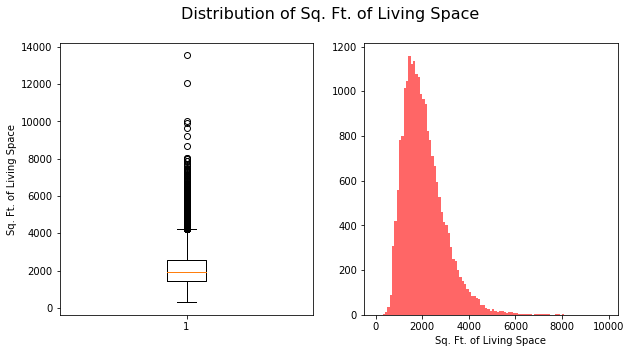

In [7]:
plt.figure(figsize=(10, 5)) 

plt.subplot(1, 2, 1)
plt.boxplot(df['sqft_living'])
plt.ylabel('Sq. Ft. of Living Space')


plt.subplot(1, 2, 2)
plt.hist(df['sqft_living'], color='red', bins=np.arange(0, 10000, 100), alpha=.6)
plt.xlabel('Sq. Ft. of Living Space')


plt.suptitle('Distribution of Sq. Ft. of Living Space', fontsize=16)
plt.show()

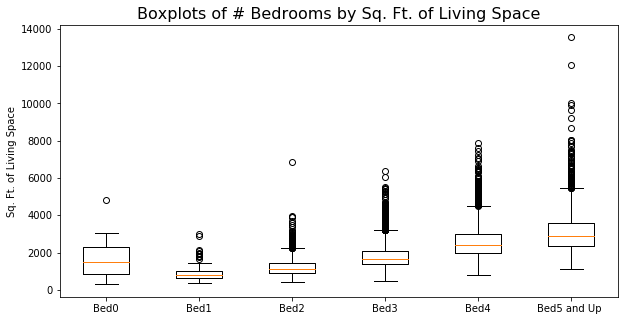

In [10]:
plt.figure(figsize=(10, 5)) 
l0 = df[df['bedrooms'] == 0]['sqft_living']
l1 = df[df['bedrooms'] == 1]['sqft_living']
l2 = df[df['bedrooms'] == 2]['sqft_living']
l3 = df[df['bedrooms'] == 3]['sqft_living']
l4 = df[df['bedrooms'] == 4]['sqft_living']
l5 = df[df['bedrooms'] >= 5]['sqft_living']
size_bed_data = [l0, l1, l2, l3, l4, l5]
plt.boxplot(size_bed_data)
plt.title('Boxplots of # Bedrooms by Sq. Ft. of Living Space', fontsize=16)
plt.ylabel('Sq. Ft. of Living Space')
plt.xticks([1,2,3,4,5,6],['Bed0', 'Bed1', 'Bed2', 'Bed3', 'Bed4',"Bed5 and Up "])
plt.show()

Looks like evidence of unimproved properties (possible land sales) and buildings like garages are in this data set.  SqFt_living is skewed much
like a lognormal.  We should probably add columns for data transformations. Now lets look at lot size and correlate these variable with price.

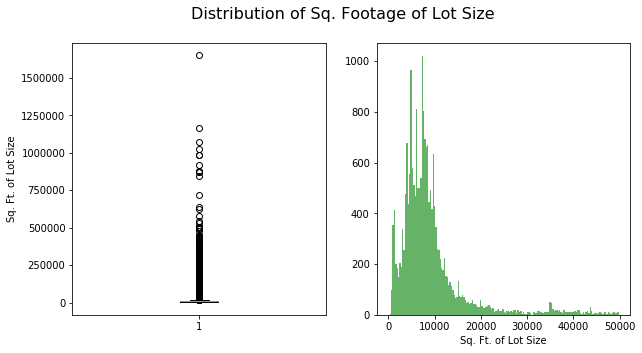

In [12]:
plt.figure(figsize=(10, 5)) 

plt.subplot(1, 2, 1)
plt.boxplot(df['sqft_lot'])
plt.ylabel('Sq. Ft. of Lot Size')


plt.subplot(1, 2, 2)
plt.hist(df['sqft_lot'], color='green', bins=np.arange(0, 50000, 300), alpha=.6)
plt.xlabel('Sq. Ft. of Lot Size')


plt.suptitle('Distribution of Sq. Footage of Lot Size', fontsize=16)
plt.show()

There are a number of huge lots in this data. However most of the sales are from lots of less than 10000 sq.ft. size.

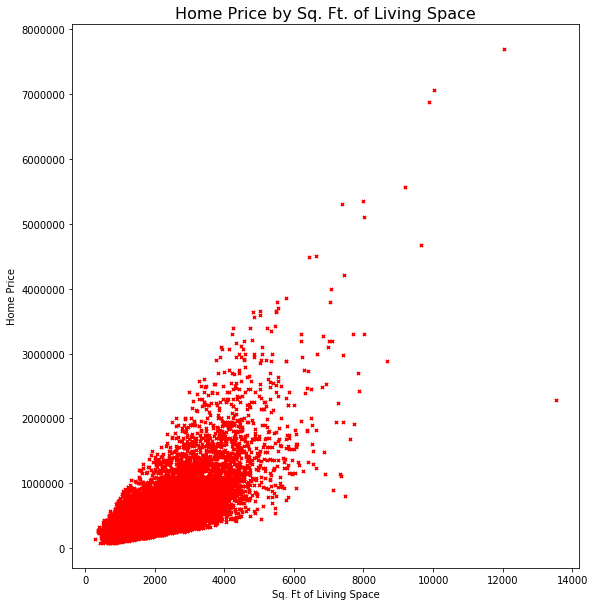

In [14]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)

x1 = df['sqft_living']
y1 = df['price']
plt.scatter(
    x=x1,
    y=y1,
    color='r',
    marker='x', s=10)
plt.title('Home Price by Sq. Ft. of Living Space', fontsize=16)
plt.ylabel('Home Price')
plt.xlabel('Sq. Ft of Living Space')
plt.show()

Both price and Sqft_living need something like a Log transform as variance increases dramatically as values increase.

In [26]:
df['lnliving'] = np.log(df['sqft_living'].astype('float64'))
df['lnprice'] = np.log(df['price'].astype('float64'))                     

Redo the above plot with these simple transformations.

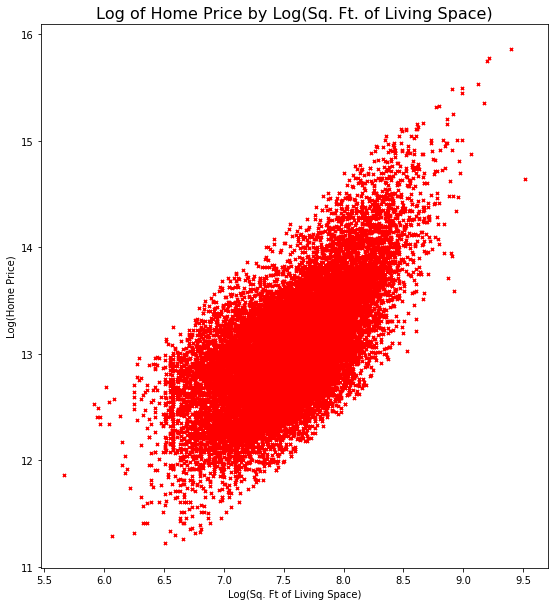

In [21]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)

x1 = df['lnliving']
y1 = df['lnprice']
plt.scatter(
    x=x1,
    y=y1,
    color='r',
    marker='x', s=10)
plt.title('Log of Home Price by Log(Sq. Ft. of Living Space)', fontsize=16)
plt.ylabel('Log(Home Price)')
plt.xlabel('Log(Sq. Ft of Living Space)')
plt.show()

Very nice linear correlation is found after these transformations.

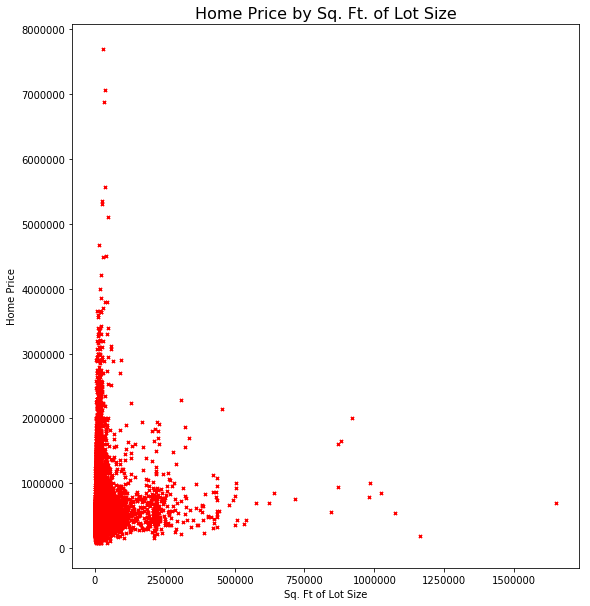

In [22]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)

x1 = df['sqft_lot']
y1 = df['price']
plt.scatter(
    x=x1,
    y=y1,
    color='r',
    marker='x', s=10)
plt.title('Home Price by Sq. Ft. of Lot Size', fontsize=16)
plt.ylabel('Home Price')
plt.xlabel('Sq. Ft of Lot Size')
plt.show()

This is more complicated.  There are mansions with relatively small lot size but great price and huge land plots with relatively modest value. Let's do the same as we did above with Sqft_living.


In [25]:
df['lnlot'] = np.log(df['sqft_lot'].astype('float64'))

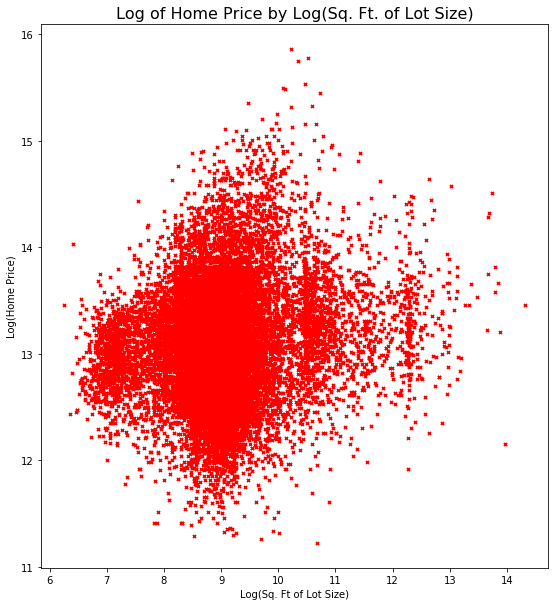

In [27]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)

x1 = df['lnlot']
y1 = df['lnprice']
plt.scatter(
    x=x1,
    y=y1,
    color='r',
    marker='x', s=10)
plt.title('Log of Home Price by Log(Sq. Ft. of Lot Size)', fontsize=16)
plt.ylabel('Log(Home Price)')
plt.xlabel('Log(Sq. Ft of Lot Size)')
plt.show()

I see some clusters of data that should most likely be handled using dummy variables.  How to formulate these
dummy variable will await the completion of the rest of the question.

### Question 2 ###

Let's look at the waterfront variable by itself.

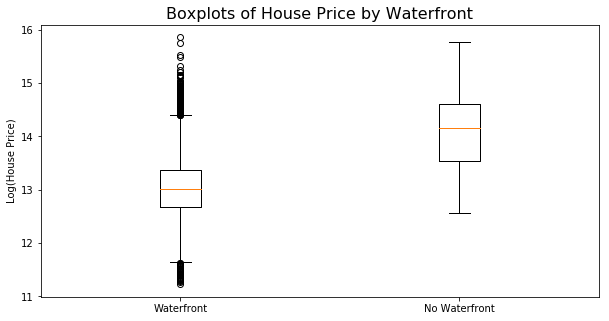

In [31]:
plt.figure(figsize=(10, 5)) 
wv0 = df[df['waterfront'] == 0]['lnprice']
wv1 = df[df['waterfront'] == 1]['lnprice']

waterview_data = [wv0, wv1]
plt.boxplot(waterview_data)
plt.title('Boxplots of House Price by Waterfront', fontsize=16)
plt.ylabel('Log(House Price)')
plt.xticks([1,2],['Waterfront', 'No Waterfront'])
plt.show()

Waterfront property seems to have a lower IQR than Non waterfront property. This is a little unexpected.  A possible explanation is that there are older dilapidated properties on waterfront areas.  Mansions might be built away from the water to reduce flood risk. 

In round 2, I will try to pull apart more information and learn how waterfront properties vary by the other indicators of home price.

### Question 3 ###

There seems to be many properties provided with a year of rennovation.

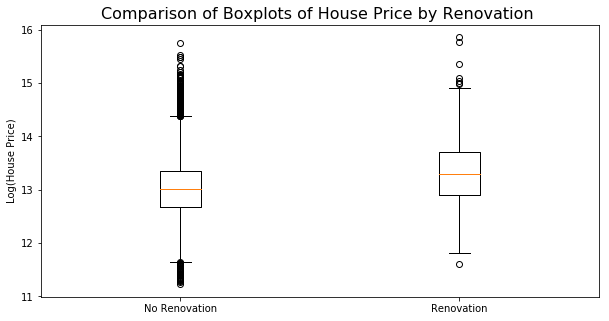

In [32]:
plt.figure(figsize=(10, 5)) 
rn0 = df[df['yr_renovated'] == 0]['lnprice']
rn1 = df[df['yr_renovated'] > 0]['lnprice']

renovate_data = [rn0, rn1]
plt.boxplot(renovate_data)
plt.title('Comparison of Boxplots of House Price by Renovation ', fontsize=16)
plt.ylabel('Log(House Price)')
plt.xticks([1,2],['No Renovation', 'Renovation'])
plt.show()

Renovated properties appear to have an advantage in price over unrenovated properties. Later I will break down if there is a price advantage to more recent renovations.

### Question 4 ###

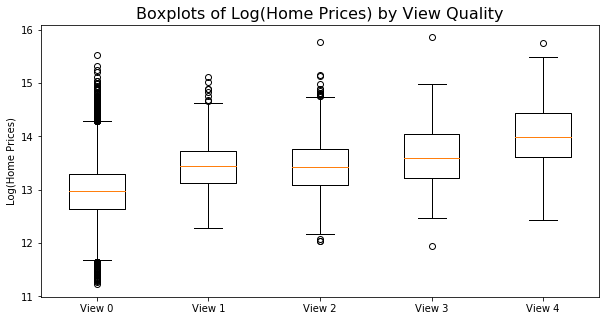

In [34]:
plt.figure(figsize=(10, 5)) 
v0 = df[df['view'] == 0]['lnprice']
v1 = df[df['view'] == 1]['lnprice']
v2 = df[df['view'] == 2]['lnprice']
v3 = df[df['view'] == 3]['lnprice']
v4 = df[df['view'] == 4]['lnprice']

view_data = [v0, v1, v2,v3, v4]
plt.boxplot(view_data)
plt.title('Boxplots of Log(Home Prices) by View Quality', fontsize=16)
plt.ylabel("Log(Home Prices)")
plt.xticks([1,2,3,4,5],['View 0', 'View 1', 'View 2', 'View 3', 'View 4'])
plt.show()

 There is a near monotonic relationship between view quality and home prices.  There might be an issue in how view level 1 and 2 are given out.

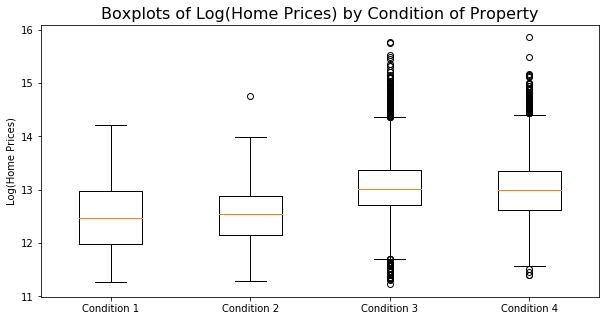

In [36]:
plt.figure(figsize=(10, 5)) 

c1 = df[df['condition'] == 1]['lnprice']
c2 = df[df['condition'] == 2]['lnprice']
c3 = df[df['condition'] == 3]['lnprice']
c4 = df[df['condition'] == 4]['lnprice']

condition_data = [c1, c2, c3, c4]
plt.boxplot(condition_data)
plt.title('Boxplots of Log(Home Prices) by Condition of Property', fontsize=16)
plt.ylabel("Log(Home Prices)")
plt.xticks([1,2,3,4],['Condition 1', 'Condition 2', 'Condition 3', 'Condition 4'])
plt.show()

Condition information is much less clear cut.  It is more useful to think of Condition 1 and 2 as poor and condition 3 and 4 as good.

In [43]:
df['midgrade'] = ((df['grade']>=6) & (df['grade'] <= 8))

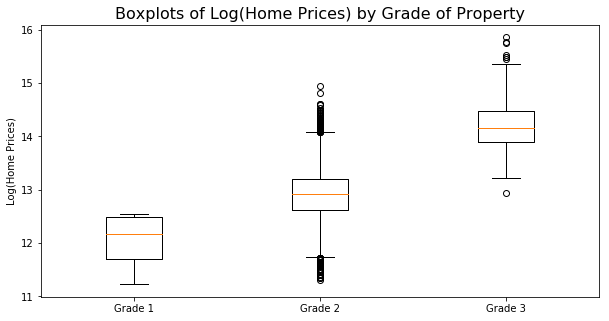

In [45]:
plt.figure(figsize=(10, 5)) 

g1 = df[df['grade'] < 4]['lnprice']
g2 = df[df['midgrade'] > 0]['lnprice']
g3 = df[df['grade'] > 10 ]['lnprice']


grade_data = [g1, g2, g3]
plt.boxplot(grade_data)
plt.title('Boxplots of Log(Home Prices) by Grade of Property', fontsize=16)
plt.ylabel("Log(Home Prices)")
plt.xticks([1,2,3],['Low Grade', 'Midgrade', 'High Grade'])
plt.show()

This is a far more informative attribute.

### Question 5 ###

Let's look at living space first.  Lot size can wait for iteration 2. 

In [46]:
df['big_neighbors'] = (df['sqft_living'] < df['sqft_living15']) 

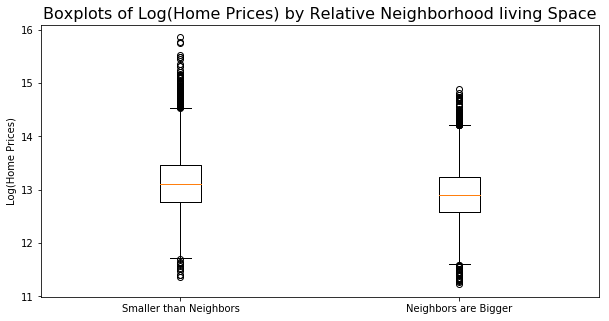

In [48]:
plt.figure(figsize=(10, 5)) 

bn1 = df[df['big_neighbors'] == 0]['lnprice']
bn2 = df[df['big_neighbors'] > 0]['lnprice']



neighbor_living_data = [bn1, bn2]
plt.boxplot(neighbor_living_data)
plt.title('Boxplots of Log(Home Prices) by Relative Neighborhood living Space', fontsize=16)
plt.ylabel("Log(Home Prices)")
plt.xticks([1,2],['Smaller than Neighbors', 'Neighbors are Bigger'])
plt.show()

It appears at first glance that if your house has more living space than your closest 15 neighbors you will tend to have
a less valuable house than houses that are smaller than their neighbors.  The effect is not overwhelmingly large.  One question that needs to be looked at is whether houses that are smaller than their neighborhoods tend to also be renovated houses.